In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [15]:
X = pd.read_csv(r"X.csv")
egg = pd.read_csv(r"y.csv")

In [16]:
# Join X and y on their indices
X['egg_price'] = egg

# Add a new column 'Y' which is the 'egg_price' column shifted down by 1 entry (lagging)
X['Y'] = X['egg_price'].shift(-1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Y', 'Year-Month']), X['Y'], test_size=0.25, shuffle = False)

In [5]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train.head()

,const,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,Christmas,Thanksgiving,Passover/Easter,gas price,egg_price
0,1.0,8,7.097,0.802,15.885375,390.50,6.500600,False,False,False,3.611,2.005
1,1.0,56,7.203,0.825,16.733152,486.30,7.465652,False,False,False,4.322,2.046
2,1.0,68,7.422,0.849,16.798190,495.28,7.859310,False,False,True,4.213,2.520
3,1.0,56,7.364,0.875,16.583690,522.29,7.838690,False,False,False,4.545,2.863
4,1.0,14,7.403,0.891,16.876064,459.59,7.597964,False,False,False,5.032,2.707


In [19]:
X_test

,const,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,Christmas,Thanksgiving,Passover/Easter,gas price,egg_price
24,1.0,8,6.637,0.971,11.648636,272.30,4.344432,False,False,True,3.733,2.864
25,1.0,10,6.818,0.964,12.184348,289.42,4.555543,False,False,False,3.725,2.699
26,1.0,8,6.827,0.993,11.724500,265.55,4.395250,False,False,False,3.576,2.715
27,1.0,3,6.883,1.017,11.180000,260.26,3.990978,False,False,False,3.600,3.080
28,1.0,4,6.955,1.009,10.128571,269.69,4.005595,False,False,False,3.338,3.821
29,1.0,20,6.869,0.998,10.032174,272.85,4.160978,False,False,False,3.261,3.370
30,1.0,93,6.843,0.956,9.953810,253.75,4.238333,False,True,False,3.175,3.649
31,1.0,294,6.915,0.949,9.833182,252.17,4.405909,True,False,False,3.139,4.146
32,1.0,36,7.044,0.973,10.284783,254.09,4.749891,False,False,False,3.196,4.953


In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [21]:
y_test

24    2.699
25    2.715
26    3.080
27    3.821
28    3.370
29    3.649
30    4.146
31    4.953
32      NaN
Name: Y, dtype: float64

Root Mean Squared Error: 0.3363658364675229
R-squared: 0.7782321765827869


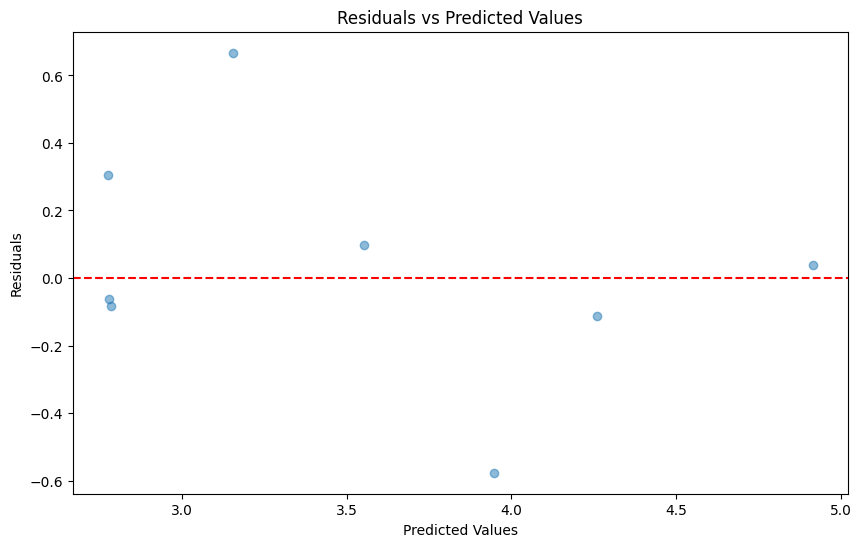

In [22]:
# Calculate the mean squared error and R-squared value  
mse = mean_squared_error(y_test.iloc[:-1], pred[:-1])
r2 = r2_score(y_test.iloc[:-1], pred[:-1])
print(f'Root Mean Squared Error: {sqrt(mse)}')
print(f'R-squared: {r2}')

# Calculate the residuals
residuals = y_test.iloc[:-1] - pred[:-1]

# Create a DataFrame for the residuals  
residuals_df = pd.DataFrame({'Actual': y_test.iloc[:-1], 'Predicted': pred[:-1], 'Residuals': residuals})


# Plot the residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pred[:-1], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Convert negative MSE to positive for interpretation
# cv_mse_scores = -cv_scores
# print(f'Cross-Validation MSE Scores: {cv_mse_scores}')
# print(f'Average Cross-Validation MSE: {cv_mse_scores.mean()}')

# Convert to RMSE to standardize with other models
cv_rmse_scores = np.sqrt(cv_mse_scores)
print(f'Cross-Validation RMSE Scores: {cv_rmse_scores}')
print(f'Average Cross-Validation RMSE: {cv_rmse_scores.mean()}')

Cross-Validation RMSE Scores: [0.2717973  0.42556831 0.53742134 0.40650406 0.74702722]
Average Cross-Validation RMSE: 0.4776636454477103


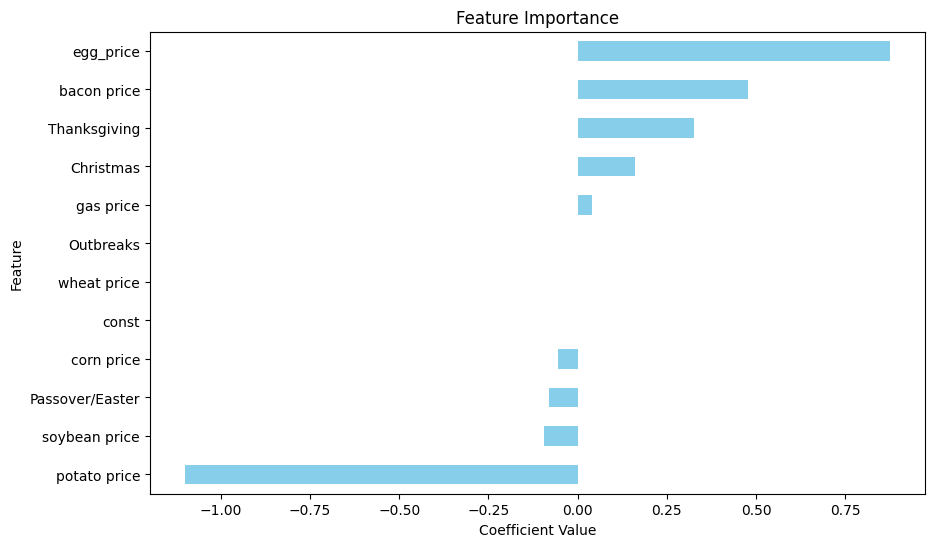

In [24]:
# Extract feature importance from the linear regression model
feature_importance = pd.Series(lr.coef_, index=X_train.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

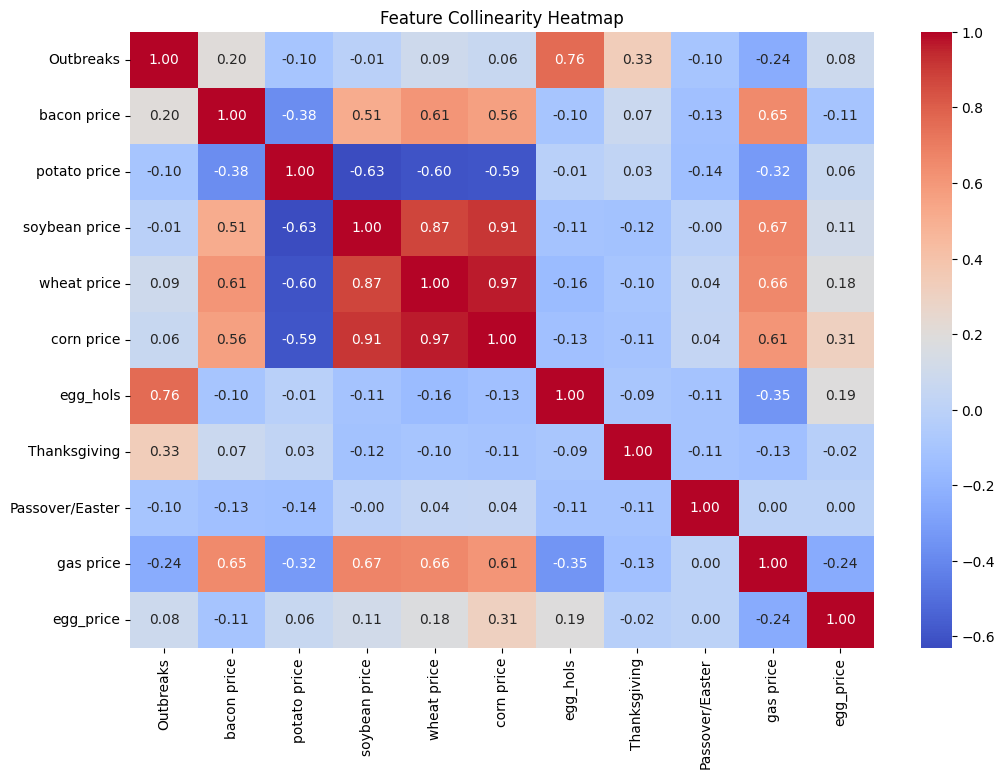

In [51]:
# Compute the correlation matrix
correlation_matrix = X_train.drop(columns=['const']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Collinearity Heatmap")
plt.show()

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train.drop(columns=['const']), y_train)

# Predict the y values for the test set
rf_pred = rf.predict(X_test.drop(columns=['const']))

# Evaluate the model
rf_rmse = sqrt(mean_squared_error(y_test.iloc[:-1], rf_pred[:-1]))
rf_r2 = r2_score(y_test.iloc[:-1], rf_pred[:-1])

print(f'Random Forest Root Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')

Random Forest Root Mean Squared Error: 0.20337765461250057
Random Forest R-squared: 0.6013626293919854


In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Convert negative MSE to positive for interpretation
# cv_mse_scores = -cv_scores
# print(f'Cross-Validation MSE Scores: {cv_mse_scores}')
# print(f'Average Cross-Validation MSE: {cv_mse_scores.mean()}')

# Convert to rmse to standardize with other models
cv_rmse_scores = np.sqrt(cv_mse_scores)
print(f'Cross-Validation RMSE Scores: {cv_rmse_scores}')
print(f'Average Cross-Validation RMSE: {cv_rmse_scores.mean()}')

Cross-Validation RMSE Scores: [0.2717973  0.42556831 0.53742134 0.40650406 0.74702722]
Average Cross-Validation RMSE: 0.4776636454477103


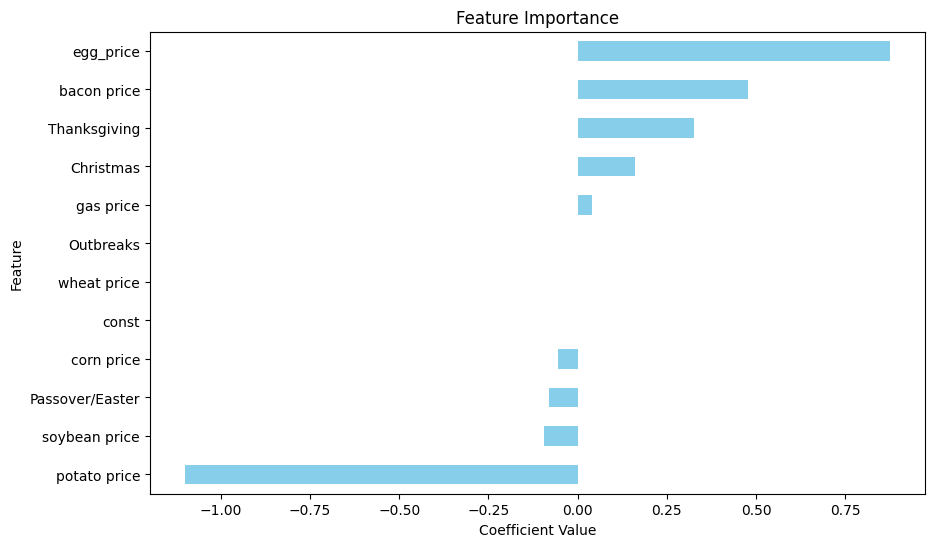

In [26]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [27]:
# Select the top 3 features based on feature importance
top_3_features = feature_importance.abs().sort_values(ascending=False).iloc[1:4].index  # Exclude 'const'

# Prepare the training and testing data with the top 3 features
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

# Train the linear regression model
lr_top3 = LinearRegression()
lr_top3.fit(X_train_top3, y_train)

# Predict on the test set
pred_top3 = lr_top3.predict(X_test_top3)

# Evaluate the model
mse_top3 = mean_squared_error(y_test.iloc[:-1], pred_top3[:-1])
r2_top3 = r2_score(y_test.iloc[:-1], pred_top3[:-1])

print(f'Root Mean Squared Error (Top 3 Features): {sqrt(mse_top3)}')
print(f'R-squared (Top 3 Features): {r2_top3}')

Root Mean Squared Error (Top 3 Features): 0.5209122025193783
R-squared (Top 3 Features): 0.4681320302156279


## LR & RF Model with Top 3 Features

In [28]:
# Select the top 3 features based on feature importance
top_3_features = feature_importance.abs().sort_values(ascending=False).iloc[1:4].index  # Exclude 'const'

# Prepare the training and testing data with the top 3 features
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

# Train the linear regression model
lr_top3 = LinearRegression()
lr_top3.fit(X_train_top3, y_train)

# Predict on the test set
pred_top3 = lr_top3.predict(X_test_top3)

# Evaluate the model
mse_top3 = mean_squared_error(y_test.iloc[:-1], pred_top3[:-1])
r2_top3 = r2_score(y_test.iloc[:-1], pred_top3[:-1])

print('Linear Regression Model with Top 3 Features')
print(f'Root Mean Squared Error (Top 3 Features): {sqrt(mse_top3)}')
print(f'R-squared (Top 3 Features): {r2_top3}')

Linear Regression Model with Top 3 Features
Root Mean Squared Error (Top 3 Features): 0.5209122025193783
R-squared (Top 3 Features): 0.4681320302156279


In [29]:
print(f'Top 3 Features used in the model: {list(top_3_features)}')

Top 3 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving']


In [31]:
# Train the Random Forest model with the top 3 features
from sklearn.ensemble import RandomForestRegressor

rf_top3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top3.fit(X_train_top3, y_train)

# Predict on the test set
rf_pred_top3 = rf_top3.predict(X_test_top3)

# Evaluate the model
rf_r2_top3 = r2_score(y_test.iloc[:-1], rf_pred_top3[:-1])
rf_rmse_top3 = sqrt(mean_squared_error(y_test.iloc[:-1], rf_pred_top3[:-1]))

# Display the results
print(f'Random Forest R-squared (Top 3 Features): {rf_r2_top3}')
print(f'Random Forest RMSE (Top 3 Features): {rf_rmse_top3}')
print(f'Top 3 Features used in the model: {list(top_3_features)}')

Random Forest R-squared (Top 3 Features): 0.4856487022908935
Random Forest RMSE (Top 3 Features): 0.5122624620494856
Top 3 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving']


In [32]:
# Select the top 4 features based on feature importance
top_4_features = feature_importance.abs().sort_values(ascending=False).iloc[1:5].index  # Exclude 'const'

# Prepare the training and testing data with the top 3 features
X_train_top4 = X_train[top_4_features]
X_test_top4 = X_test[top_4_features]

# Train the linear regression model
lr_top4 = LinearRegression()
lr_top4.fit(X_train_top4, y_train)

# Predict on the test set
pred_top4 = lr_top4.predict(X_test_top4)

# Evaluate the model
mse_top4 = mean_squared_error(y_test.iloc[:-1], pred_top4[:-1])
r2_top4 = r2_score(y_test.iloc[:-1], pred_top4[:-1])

print('Linear Regression Model with Top 4 Features')
print(f'Root Mean Squared Error (Top 4 Features): {sqrt(mse_top4)}')
print(f'R-squared (Top 4 Features): {r2_top4}')

Linear Regression Model with Top 4 Features
Root Mean Squared Error (Top 4 Features): 0.4581062402492603
R-squared (Top 4 Features): 0.5886540835146021


In [33]:
print(f'Top 4 Features used in the model: {list(top_4_features)}')

Top 4 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving', 'Christmas']


In [34]:
# Train the Random Forest model with the top 4 features
rf_top4 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top4.fit(X_train_top4, y_train)

# Predict on the test set
rf_pred_top4 = rf_top4.predict(X_test_top4)

# Evaluate the model
rf_r2_top4 = r2_score(y_test.iloc[:-1], rf_pred_top4[:-1])
rf_rmse_top4 = sqrt(mean_squared_error(y_test.iloc[:-1], rf_pred_top4[:-1]))

# Display the results
print(f'Random Forest R-squared (Top 4 Features): {rf_r2_top4}')
print(f'Random Forest RMSE (Top 4 Features): {rf_rmse_top4}')
print(f'Top 4 Features used in the model: {list(top_4_features)}')

Random Forest R-squared (Top 4 Features): 0.5473226387330119
Random Forest RMSE (Top 4 Features): 0.4805703809407119
Top 4 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving', 'Christmas']


In [35]:
# Select the top 5 features based on feature importance
top_5_features = feature_importance.abs().sort_values(ascending=False).iloc[1:6].index  # Exclude 'const'

# Prepare the training and testing data with the top 5 features
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

# Train the linear regression model
lr_top5 = LinearRegression()
lr_top5.fit(X_train_top5, y_train)

# Predict on the test set
pred_top5 = lr_top5.predict(X_test_top5)

# Evaluate the model
mse_top5 = mean_squared_error(y_test.iloc[:-1], pred_top5[:-1])
r2_top5 = r2_score(y_test.iloc[:-1], pred_top5[:-1])

print('Linear Regression Model with Top 5 Features')
print(f'Root Mean Squared Error (Top 5 Features): {sqrt(mse_top5)}')
print(f'R-squared (Top 5 Features): {r2_top5}')

Linear Regression Model with Top 5 Features
Root Mean Squared Error (Top 5 Features): 0.3639863538261782
R-squared (Top 5 Features): 0.7403161276392499


In [36]:
print(f'Top 5 Features used in the model: {list(top_5_features)}')

Top 5 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving', 'Christmas', 'soybean price']


In [37]:
# Train the Random Forest model with the top 5 features
rf_top5 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top5.fit(X_train_top4, y_train)

# Predict on the test set
rf_pred_top5 = rf_top5.predict(X_test_top4)

# Evaluate the model
rf_r2_top5 = r2_score(y_test.iloc[:-1], rf_pred_top5[:-1])
rf_rmse_top5 = sqrt(mean_squared_error(y_test.iloc[:-1], rf_pred_top5[:-1]))

# Display the results
print(f'Random Forest R-squared (Top 5 Features): {rf_r2_top5}')
print(f'Random Forest RMSE (Top 5 Features): {rf_rmse_top5}')
print(f'Top 5 Features used in the model: {list(top_5_features)}')

Random Forest R-squared (Top 5 Features): 0.5473226387330119
Random Forest RMSE (Top 5 Features): 0.4805703809407119
Top 5 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving', 'Christmas', 'soybean price']


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# import x
X = pd.read_csv(r"X.csv")
X.head()

,Year-Month,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,Christmas,Thanksgiving,Passover/Easter,gas price
0,2022-02,8,7.097,0.802,15.885375,390.50,6.500600,False,False,False,3.611
1,2022-03,56,7.203,0.825,16.733152,486.30,7.465652,False,False,False,4.322
2,2022-04,68,7.422,0.849,16.798190,495.28,7.859310,False,False,True,4.213
3,2022-05,56,7.364,0.875,16.583690,522.29,7.838690,False,False,False,4.545
4,2022-06,14,7.403,0.891,16.876064,459.59,7.597964,False,False,False,5.032


In [45]:
X_VIF = add_constant(X)  # Adds intercept term for VIF computation
X_VIF = X_VIF.drop(columns=['Christmas', 'Thanksgiving', 'Year-Month', 'Passover/Easter'])  # Drop non-numeric columns
X_VIF.head()

,const,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,gas price
0,1.0,8,7.097,0.802,15.885375,390.50,6.500600,3.611
1,1.0,56,7.203,0.825,16.733152,486.30,7.465652,4.322
2,1.0,68,7.422,0.849,16.798190,495.28,7.859310,4.213
3,1.0,56,7.364,0.875,16.583690,522.29,7.838690,4.545
4,1.0,14,7.403,0.891,16.876064,459.59,7.597964,5.032


In [46]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]

print(vif_data)

         feature          VIF
0          const  1422.682657
1      Outbreaks     1.381478
2    bacon price     2.207755
3   potato price     1.544948
4  soybean price     8.250990
5    wheat price    21.357499
6     corn price    23.163139
7      gas price     3.558900


In [50]:
# drop corn because high VIF
X_VIF1 = X.drop(columns=['corn price'])
X_VIF1 = add_constant(X_VIF1)  # Adds intercept term for VIF computation
X_VIF1 = X_VIF1.drop(columns=['Christmas', 'Thanksgiving', 'Year-Month', 'Passover/Easter'])  # Drop non-numeric columns
X_VIF1.head()

vif_data1 = pd.DataFrame()
vif_data1["feature"] = X_VIF1.columns
vif_data1["VIF"] = [variance_inflation_factor(X_VIF1.values, i) for i in range(X_VIF1.shape[1])]

print(vif_data1)

         feature          VIF
0          const  1419.891771
1      Outbreaks     1.373359
2    bacon price     2.175152
3   potato price     1.537513
4  soybean price     6.653933
5    wheat price     7.402632
6      gas price     3.324718


In [51]:
# drop wheat because high VIF
X_VIF2 = X.drop(columns=['corn price', 'wheat price'])
X_VIF2 = add_constant(X_VIF2)  # Adds intercept term for VIF computation
X_VIF2 = X_VIF2.drop(columns=['Christmas', 'Thanksgiving', 'Year-Month', 'Passover/Easter'])  # Drop non-numeric columns
X_VIF2.head()

vif_data2 = pd.DataFrame()
vif_data2["feature"] = X_VIF2.columns
vif_data2["VIF"] = [variance_inflation_factor(X_VIF2.values, i) for i in range(X_VIF2.shape[1])]

print(vif_data2)

         feature          VIF
0          const  1349.962397
1      Outbreaks     1.352735
2    bacon price     1.940406
3   potato price     1.473270
4  soybean price     2.492822
5      gas price     3.302422


final features after dropping features with high VIF's:
- Outbreaks  
- bacon price  
- potato price  
- soybean price  
- gas price  

In [52]:
X_train.head()

,const,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,Christmas,Thanksgiving,Passover/Easter,gas price,egg_price
0,1.0,8,7.097,0.802,15.885375,390.50,6.500600,False,False,False,3.611,2.005
1,1.0,56,7.203,0.825,16.733152,486.30,7.465652,False,False,False,4.322,2.046
2,1.0,68,7.422,0.849,16.798190,495.28,7.859310,False,False,True,4.213,2.520
3,1.0,56,7.364,0.875,16.583690,522.29,7.838690,False,False,False,4.545,2.863
4,1.0,14,7.403,0.891,16.876064,459.59,7.597964,False,False,False,5.032,2.707


In [54]:
# Retrain backtesting model with corn and wheat removed
VIF_features = ['corn price', 'wheat price','const']
X_train_VIF = X_train.drop(columns=VIF_features)
X_test_VIF = X_test.drop(columns=VIF_features)

# Train the linear regression model
lr_VIF = LinearRegression()
lr_VIF.fit(X_train_VIF, y_train)

# Predict on the test set
pred_VIF = lr_VIF.predict(X_test_VIF)

# Evaluate the model
mse_VIF = mean_squared_error(y_test.iloc[:-1], pred_VIF[:-1])
r2_VIF = r2_score(y_test.iloc[:-1], pred_VIF[:-1])

print('Linear Regression Model with VIF Features Removed')
print(f'Root Mean Squared Error (after VIF): {sqrt(mse_VIF)}')
print(f'R-squared (with VIF features removed): {r2_top3}')

Linear Regression Model with VIF Features Removed
Root Mean Squared Error (after VIF): 0.33337459225460103
R-squared (with VIF features removed): 0.4681320302156279


No improvement with VIF features removed - go with first model including all features